In [29]:
import stanza
import spacy
import glob
import pandas as pd
import matplotlib.pyplot as plt
import stanza.pipeline
import numpy as np

In [23]:
# initialization of stanza pipeline
stanza.download('en')
nlp_stanza = stanza.Pipeline('en', processors='tokenize,ner') 

# initialization of spacy pipeline
nlp_spacy = spacy.load('en_core_web_sm')

2024-06-15 15:49:37 INFO: Downloaded file to /home/marina/stanza_resources/resources.json
2024-06-15 15:49:37 INFO: Downloading default packages for language: en (English) ...
2024-06-15 15:49:38 INFO: File exists: /home/marina/stanza_resources/en/default.zip
2024-06-15 15:49:44 INFO: Finished downloading models and saved to /home/marina/stanza_resources
2024-06-15 15:49:44 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-06-15 15:49:46 INFO: Downloaded file to /home/marina/stanza_resources/resources.json
2024-06-15 15:49:46 WARNING: Language en package default expects mwt, which has been added
2024-06-15 15:49:46 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner

In [36]:
# storing all journalists biographies
path_journalists = './Biographies/Biographies_Journalists/*.txt'
files_journalists = glob.glob(path_journalists)

# storing all sculptors biographies
path_sculptors = './Biographies/Biographies_Sculptors/*.txt'
files_sculptors = glob.glob(path_sculptors)

In [37]:
# gets ents from given .txt file using stanza
def extract_ents_stanza(file):
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
        doc = nlp_stanza(content)
        ents = [(ent.text, ent.type) for ent in doc.ents]
    return ents


# gets ents from given .txt file using spacy
def extract_ents_spacy(file):
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
        doc = nlp_spacy(content)
        ents = [(ent.text, ent.label_) for ent in doc.ents]
    return ents

# stores ents of a list of .txt files using both stanza and spacy
# returns a list of dictionnaries
def store_ents(files):
    data = []
    for file in files:
        file_name = file.split('/')[-1]
        data.append({'file_name': file_name, 
                     'ents_stanza': extract_ents_stanza(file), 
                     'ents_spacy': extract_ents_spacy(file)})
    return data

In [46]:
# storing journalists ents in pandas dataframe
data_journalists = store_ents(files_journalists)
df_journalists = pd.DataFrame(data_journalists)
df_journalists.head()

# creating csv file from created dataframe
df_journalists.to_csv('ents_journalists.csv', index=False) 
df_journalists.to_pickle('ents_journalists.pkl')

# storing sculptors ents in pandas dataframe
data_sculptors = store_ents(files_sculptors)
df_sculptors = pd.DataFrame(data_sculptors)
df_sculptors.head()

# creating csv file from created dataframe
df_sculptors.to_csv('ents_sculptors.csv', index=False) 
df_sculptors.to_pickle('ents_sculptors.pkl')

KeyboardInterrupt: 

In [47]:
# computing number of ents for both categories (journalists, sculptors) and packages (stanza, spacy)
nb_ents_journalists_stanza = df_journalists['ents_stanza'].apply(len) # journalists*stanza
nb_ents_journalists_spacy = df_journalists['ents_spacy'].apply(len) # journalits * spacy
nb_ents_sculptors_stanza = df_sculptors['ents_stanza'].apply(len) # sculptors * stanza
nb_ents_sculptors_spacy = df_sculptors['ents_spacy'].apply(len) # sculptors * spacy

# creating list to facilitate computations
nb_ents_list = [nb_ents_journalists_stanza,nb_ents_journalists_spacy,nb_ents_sculptors_stanza,nb_ents_sculptors_spacy]

# computing average, minimum and maximum of number of ents per category per package
avg_nb_ents = [np.mean(list) for list in nb_ents_list]
min_nb_ents = [np.min(list) for list in nb_ents_list]
max_nb_ents = [np.max(list) for list in nb_ents_list]

In [48]:
# computing number of words per ent for both categories (journalists, sculptors) and packages (stanza, spacy)
nb_words_journalists_stanza = [len(ent[0].split()) for ents in df_journalists['ents_stanza'] for ent in ents] # journalists*stanza
nb_words_journalists_spacy = [len(ent[0].split()) for ents in df_journalists['ents_spacy'] for ent in ents] # journalits * spacy
nb_words_sculptors_stanza = [len(ent[0].split()) for ents in df_sculptors['ents_stanza'] for ent in ents] # sculptors * stanza
nb_words_sculptors_spacy = [len(ent[0].split()) for ents in df_sculptors['ents_spacy'] for ent in ents] # sculptors * spacy

# creating list to facilitate computations
nb_words_list = [nb_words_journalists_spacy,nb_words_journalists_spacy,nb_words_sculptors_stanza,nb_words_sculptors_spacy]

# computing average, minimum and maximum of number of words per ent per category per package
avg_nb_words = [np.mean(list) for list in nb_words_list]
min_nb_words = [np.min(list) for list in nb_words_list]
max_nb_words = [np.max(list) for list in nb_words_list]

In [49]:
# creating dictionnary from computed statistics
data = {"category" : ["Journalists","Journalists","Sculptors","Sculptors"],
                "package" : ["stanza","spacy","stanza","spacy"],
                "avg_nb_ents" : avg_nb_ents,
                "min_nb_ents" : min_nb_ents,
                "max_nb_ents" : max_nb_ents,
                "avg_nb_words" : avg_nb_words,
                "min_nb_words" : min_nb_words,
                "max_nb_words" : max_nb_words}
                
# creating pandas dataframe from dictionnary
df_statistics = pd.DataFrame(data)
df_statistics.head()

,category,package,avg_nb_ents,min_nb_ents,max_nb_ents,avg_nb_words,min_nb_words,max_nb_words
0,Journalists,stanza,181.945736,8,1854,1.717755,1,29
1,Journalists,spacy,176.217054,8,1722,1.717755,1,29
2,Sculptors,stanza,135.230769,4,1485,2.027133,1,32
3,Sculptors,spacy,133.200000,2,1486,1.855625,1,18


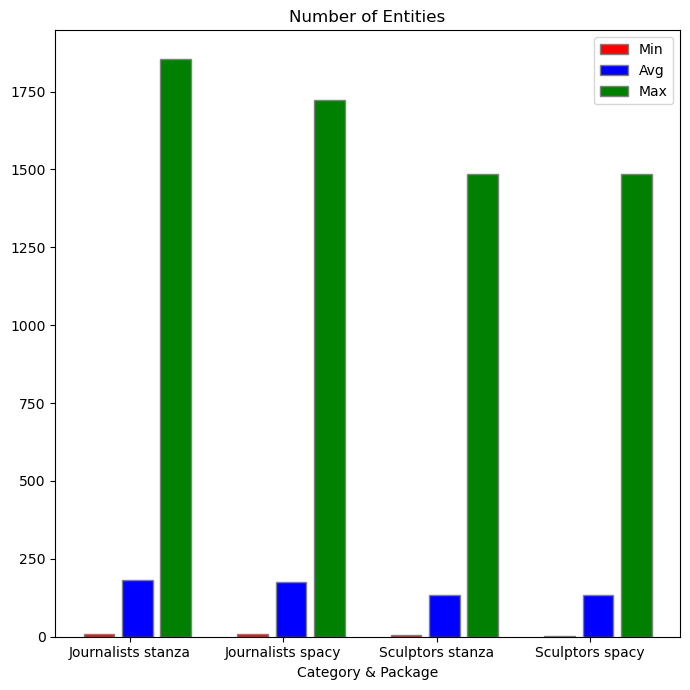

In [50]:
# plotting number of entities per category per package
fig1, ax1 = plt.subplots(figsize=(7, 7))
bar_width = 0.2
bar_spacing = 0.05

r1 = np.arange(len(df_statistics))
r2 = [x + bar_width + bar_spacing for x in r1]
r3 = [x + 2*(bar_width + bar_spacing) for x in r1]

ax1.bar(r1, df_statistics['min_nb_ents'], color='red', width=bar_width, edgecolor='grey', label='Min')
ax1.bar(r2, df_statistics['avg_nb_ents'], color='blue', width=bar_width, edgecolor='grey', label='Avg')
ax1.bar(r3, df_statistics['max_nb_ents'], color='green', width=bar_width, edgecolor='grey', label='Max')

ax1.set_xlabel('Category & Package')
ax1.set_title('Number of Entities')
ax1.set_xticks([r + bar_width for r in range(len(df_statistics))])
ax1.set_xticklabels(df_statistics['category'] + ' ' + df_statistics['package'])
ax1.legend()

plt.tight_layout()
plt.show()

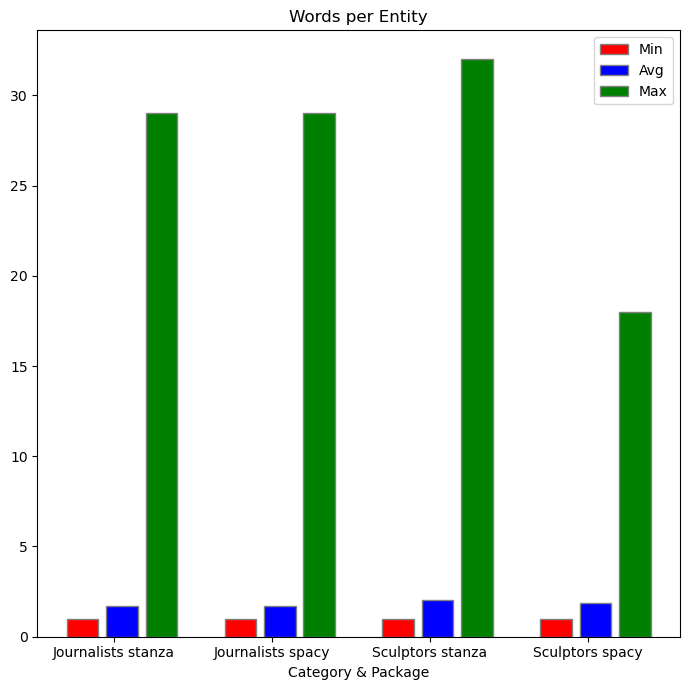

In [51]:
# plotting number of word per ent per category per package
fig2, ax2 = plt.subplots(figsize=(7, 7))
bar_width = 0.2
bar_spacing = 0.05

r1 = np.arange(len(df_statistics))
r2 = [x + bar_width + bar_spacing for x in r1]
r3 = [x + 2*(bar_width + bar_spacing) for x in r1]

ax2.bar(r1, df_statistics['min_nb_words'], color='red', width=bar_width, edgecolor='grey', label='Min')
ax2.bar(r2, df_statistics['avg_nb_words'], color='blue', width=bar_width, edgecolor='grey', label='Avg')
ax2.bar(r3, df_statistics['max_nb_words'], color='green', width=bar_width, edgecolor='grey', label='Max')

ax2.set_xlabel('Category & Package')
ax2.set_title('Words per Entity')
ax2.set_xticks([r + bar_width for r in range(len(df_statistics))])
ax2.set_xticklabels(df_statistics['category'] + ' ' + df_statistics['package'])
ax2.legend()

plt.tight_layout()
plt.show()